In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\House_data.csv")

In [45]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [47]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [79]:
updated_df = df.drop(['id','condition','date','bedrooms','bathrooms','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1)

In [80]:
updated_df.head(5)

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [81]:
updated_df.isnull().sum()

price          0
sqft_living    0
dtype: int64

In [125]:
X = updated_df.iloc[:,0].values

In [126]:
X

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [127]:
y = updated_df.iloc[:,-1].values

In [128]:
y

array([1180, 2570,  770, ..., 1020, 1600, 1020], dtype=int64)

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 52)

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
X_train = X_train.reshape(len(X_train),1)
y_train = y_train.reshape(len(y_train),1)

In [133]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [226]:
y_predict = reg.predict(X_test)
y_predict

array([480998.85438917, 692299.20416728, 971477.20023437, ...,
       539352.67394788, 509673.13936994, 574547.28220076])

In [135]:
import matplotlib.pyplot as plt

In [136]:
X = X.reshape(len(X),1)

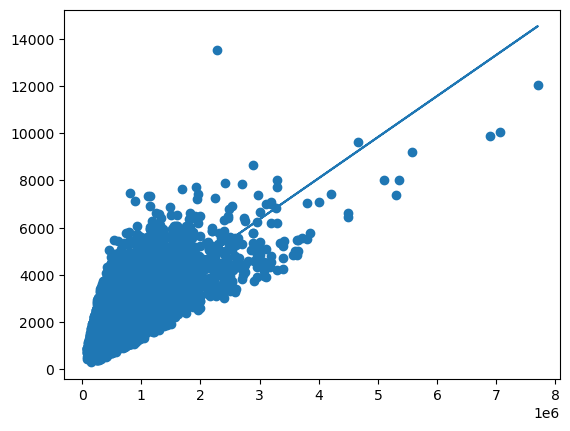

In [137]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X))

In [138]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [139]:
df = df.drop(['id','date','waterfront','view','condition','grade','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15'], axis=1)

In [140]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,1933,0,98028
3,604000.0,4,3.00,1960,5000,1.0,1965,0,98136
4,510000.0,3,2.00,1680,8080,1.0,1987,0,98074


In [177]:
X = df.iloc[:,1:8].values

In [178]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 1.000e+00, 1.955e+03,
        0.000e+00],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 2.000e+00, 1.951e+03,
        1.991e+03],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 1.000e+00, 1.933e+03,
        0.000e+00],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.000e+00, 2.009e+03,
        0.000e+00],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 2.000e+00, 2.004e+03,
        0.000e+00],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.000e+00, 2.008e+03,
        0.000e+00]])

In [179]:
y = df.iloc[:,0].values

In [180]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [237]:
X_train

array([[3.000e+00, 1.750e+00, 1.780e+03, ..., 1.000e+00, 1.983e+03,
        0.000e+00],
       [2.000e+00, 1.000e+00, 1.000e+03, ..., 1.000e+00, 1.929e+03,
        0.000e+00],
       [3.000e+00, 1.000e+00, 1.080e+03, ..., 1.500e+00, 1.942e+03,
        0.000e+00],
       ...,
       [3.000e+00, 2.500e+00, 2.120e+03, ..., 2.000e+00, 2.004e+03,
        0.000e+00],
       [1.000e+00, 7.500e-01, 3.800e+02, ..., 1.000e+00, 1.963e+03,
        0.000e+00],
       [4.000e+00, 2.500e+00, 3.130e+03, ..., 2.000e+00, 2.006e+03,
        0.000e+00]])

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
reg = LinearRegression()

In [185]:
reg.fit(X_train,y_train)

LinearRegression()

In [212]:
y_predict = reg.predict(X_test)

In [213]:
import matplotlib.pyplot as plt

In [214]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 1.000e+00, 1.955e+03,
        0.000e+00],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 2.000e+00, 1.951e+03,
        1.991e+03],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 1.000e+00, 1.933e+03,
        0.000e+00],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.000e+00, 2.009e+03,
        0.000e+00],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 2.000e+00, 2.004e+03,
        0.000e+00],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.000e+00, 2.008e+03,
        0.000e+00]])

In [215]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [216]:
X.shape

(21613, 7)

In [217]:
y.shape

(21613,)

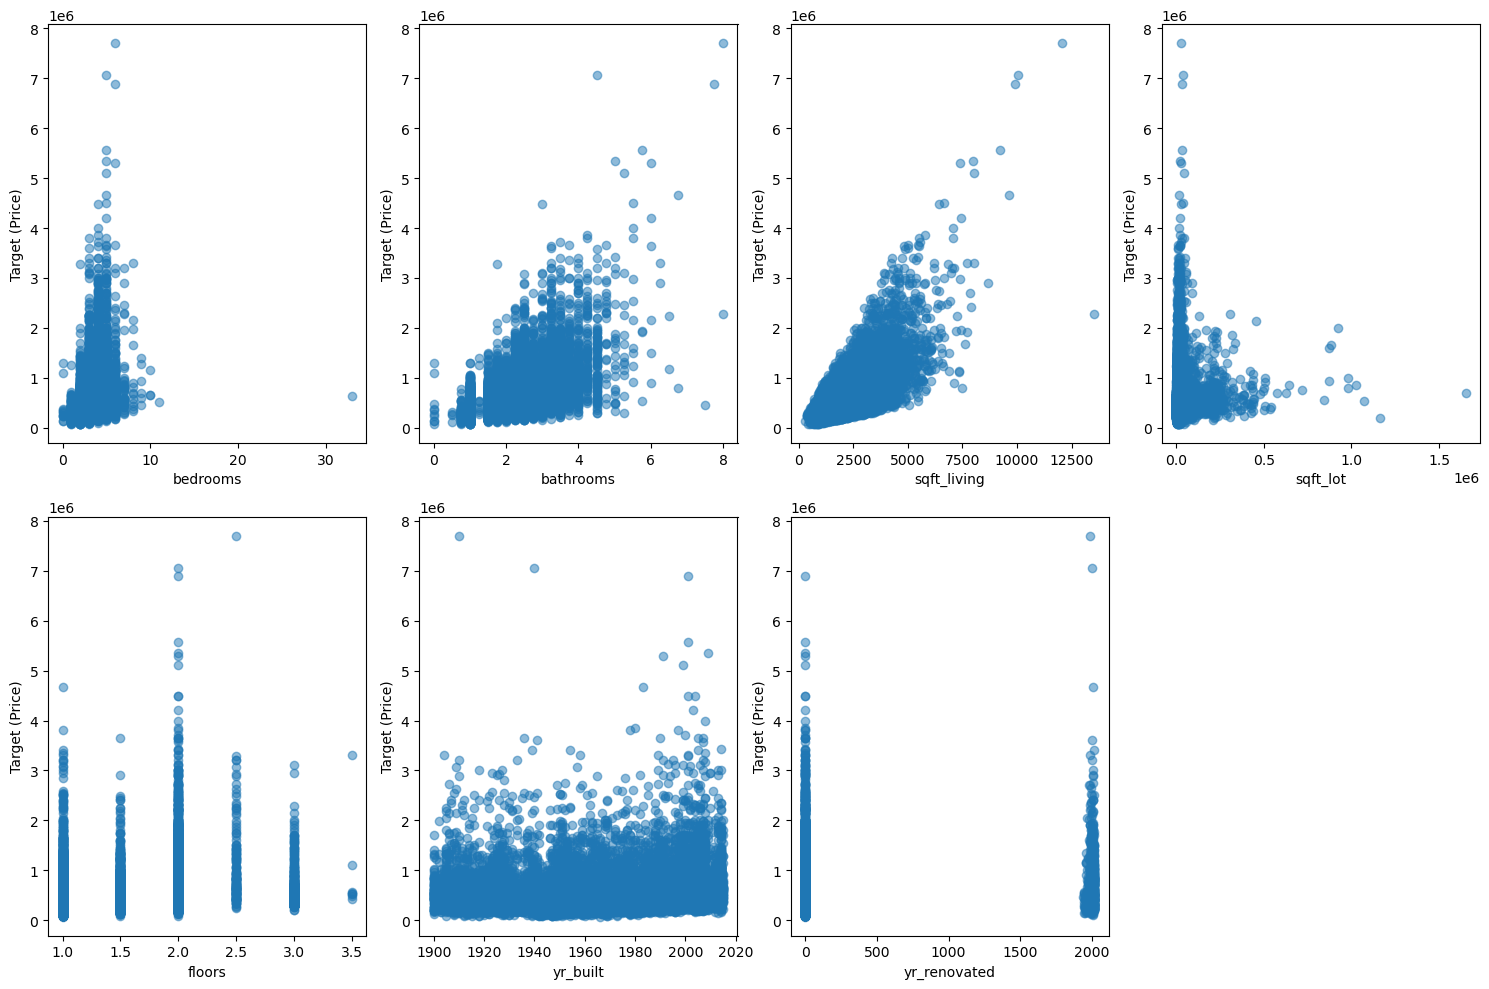

In [218]:
import matplotlib.pyplot as plt

# Check if X and y have the same number of rows (optional, but good practice)
assert X.shape[0] == y.shape[0], "X and y must have the same number of data points"

# Get the column names of X
column_names = df.columns[1:8]

# Create subplots for each feature
plt.figure(figsize=(15, 10))
for i, col_name in enumerate(column_names):
    plt.subplot(2, 4, i + 1)  # Adjust the subplot layout as needed
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.xlabel(col_name)
    plt.ylabel("Target (Price)")

plt.tight_layout()
plt.show()


In [219]:
from sklearn.metrics import mean_squared_error,r2_score

In [222]:
mse = mean_squared_error(y_test,y_predict)
mse

68465008265.59316

In [224]:
r2 = r2_score(y_test,y_predict)
r2

0.5476519275304453

In [227]:
from sklearn.preprocessing import PolynomialFeatures

In [228]:
degree =3
poly = PolynomialFeatures(degree)

In [230]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [231]:
reg.fit(X_train_poly,y_train)

LinearRegression()

In [232]:
y_predict = reg.predict(X_test_poly)

In [233]:
mse = mean_squared_error(y_test,y_predict)

In [234]:
from sklearn.preprocessing import PolynomialFeatures

degree = 3
poly = PolynomialFeatures()


In [235]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [236]:
reg.fit(X_train_poly,y_train)

LinearRegression()